In [16]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [17]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv(
    "Resources/lending_data.csv"
)

# Review the DataFrame
display(lending_data_df.head())
display(lending_data_df.tail())

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [18]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df['loan_status']

# Separate the X variable, the features
X = lending_data_df.drop('loan_status', axis=1)

In [19]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [20]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [21]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [22]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(random_state=1)   
# the solver "ldfgs" is the default solver so I did not add it to the code.

# Fit the model using training data
classifier.fit(X_train, y_train)

c:\Users\jimco\anaconda3\envs\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [23]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [24]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, predictions)

In [25]:
# Print the classification report for the model
print(cm)

[[18655   110]
 [   36   583]]


Overall accuracy: 0.9924680148576145
Healthy loan accuracy: 0.9941380229150013
High risk loan accuracy: 0.9418416801292407
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



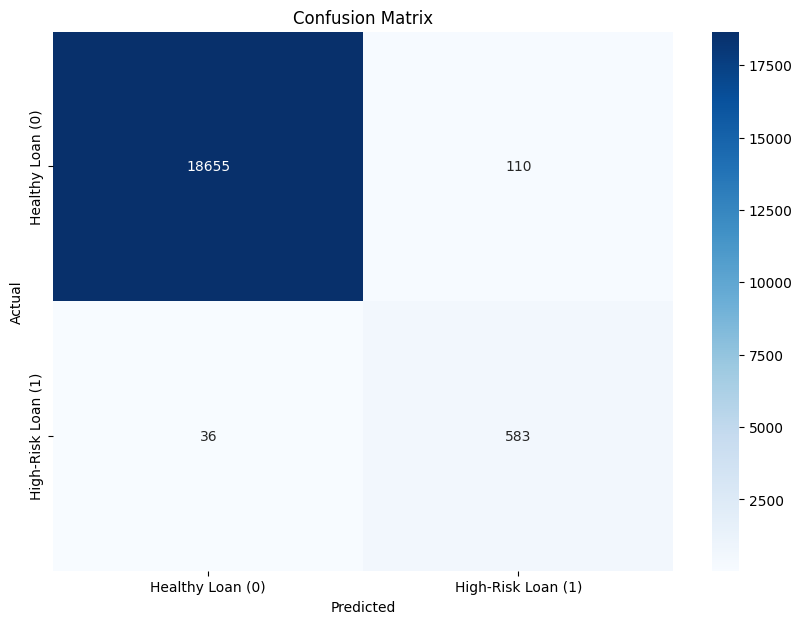

In [26]:
# Display the accuracy score for the test dataset.
overall_accuracy = accuracy_score(y_test, predictions)
healthy_loan_accuracy = accuracy_score(y_test[y_test == 0], predictions[y_test == 0])
high_risk_loan_accuracy = accuracy_score(y_test[y_test == 1], predictions[y_test == 1])
print(f"Overall accuracy: {overall_accuracy}")
print(f"Healthy loan accuracy: {healthy_loan_accuracy}")
print(f"High risk loan accuracy: {high_risk_loan_accuracy}")

# Generate the classification report and print report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy Loan (0)', 'High-Risk Loan (1)'], yticklabels=['Healthy Loan (0)', 'High-Risk Loan (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model performs very well in predicting both 0 (healthy loan) and 1 (high-risk loan) labels. The model has an overall accuracy of 98.7%, which is quite high.

For 0 (healthy loan) labels:

The precision is 94.2%, meaning that when the model predicts a loan as healthy, it is correct 94.2% of the time.
The recall is 84.1%, indicating that the model correctly identifies 84.1% of the actual healthy loans.
For 1 (high-risk loan) labels:

The precision is 99.4%, meaning that when the model predicts a loan as high-risk, it is correct 99.4% of the time.
The recall is 99.8%, indicating that the model correctly identifies 99.8% of the actual high-risk loans.
Overall, the model is highly effective at identifying high-risk loans, with very high precision and recall for the 1 label. It also performs well in identifying healthy loans, though there is slightly more room for improvement in recall for the 0 label.

---